# Introduction

"5G's movie download time is negligible! Oh wait, you should reserve some time to decide which movie you want to download"

As technology advances, we get to have everything we want at our finger tips. However, when it comes to movies; everybody knows the real struggle is to choose what that you will not regret having spent your precious leisure time on. There is nothing as annoying as downloading, streaming or even going to a cenema for a movie and only realizing after watching the first 30 minutes that it was all "an accident". In most cases you will no longer even have ernegy to choose again. 

Some people tend to even go as far as reading the movie abstract in order to know if the movie would be as nice as they hope. But is that not tasting the cake before the party?

![title](data-.jpg)

# Problem Statement
The followig aims to train a movie recommendation system which will accurately predict a person's rating of an unseen  movie based on their historic choices.

# **Table of contents:**
- [Import libraries](#section-one)
- [Loading data](#section-two)
- [Evaluating Data](#section-three)
- [Data preprocessing](#section-four)
  * [Checking for missing values column wise](#subsection-one)
  * [Checking for duplicates records](#subsection-two)
  * [Joining Datasets](#subsection-four)
- [Exploratory data analysis](#section-five)
- [Modelling Phase](#section-six)
- [Hyperparameter Tunning](#section-seven)
- [Links to the Notebooks](Section-eight)
- [Links to Github and Trello](Section-nine)
- [Conclusion](#section-ten)
- [Collaborators](Section-eleven)
- [Comet](#section-twelve)



<a id="section-one"></a>
# Importing packages

In [42]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Packages for modeling
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import NormalPredictor
from surprise import KNNBaseline
from surprise import KNNWithZScore
from surprise import BaselineOnly
   
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from surprise import accuracy
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Hyperparameter tuning
from surprise.model_selection import GridSearchCV

<a id="section-two"></a>
# Reading in data  

In [43]:
df_sample_submission = pd.read_csv('submissions\sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

<a id="section-three"></a>
# Examining the data

In [3]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [4]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [7]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [9]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [10]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [11]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
df_sample_submission.head(10)

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0
5,1_8405,1.0
6,1_8786,1.0
7,2_150,1.0
8,2_356,1.0
9,2_497,1.0


<a id="section-three"></a>
# EXPLORATORY DATA ANALYSIS
Discovery phase and data understanding

![title](eda.jpg)

## Most common Genres

In [13]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


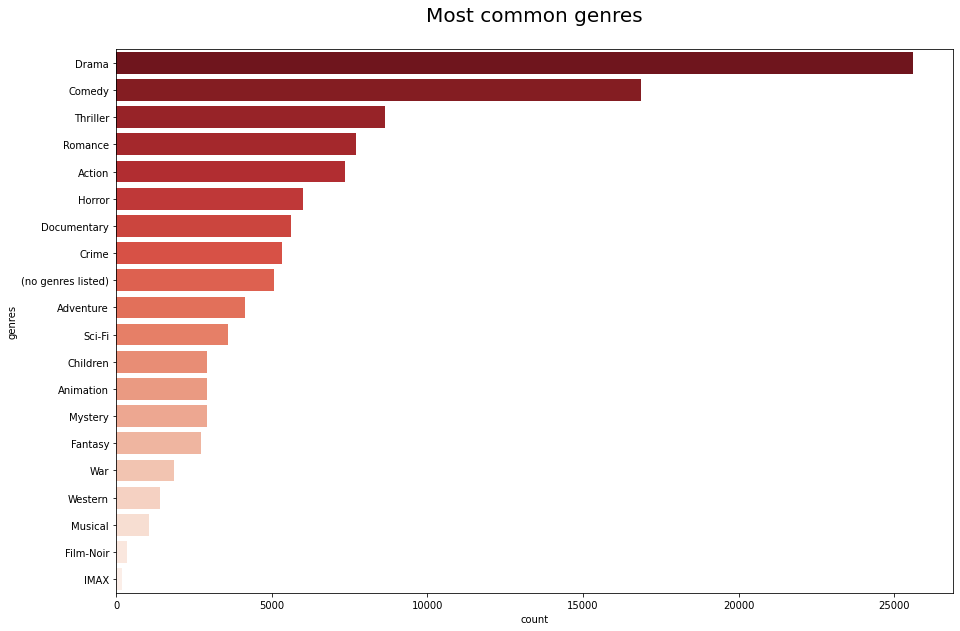

In [15]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

Deleting unnecessary columns

In [44]:
df_train = df_train.drop('timestamp',axis = 1)
df_tags = df_tags.drop('timestamp',axis = 1)

Merging the dataframes

In [45]:
data = pd.merge(df_train , df_movies , how='outer', on='movieId')
test = pd.merge(df_test , df_movies , how='outer', on='movieId')
data.head()

,userId,movieId,rating,title,genres
0,5163.0,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388.0,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050.0,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490.0,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616.0,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller


To reduce the dimensionality of the data set, and avoid running into “memory error”, we will filter out rarely rated movies and rarely rating users.

In [46]:
min_movie_ratings = 50
filter_movies = data['movieId'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 50
filter_users = data['userId'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = data[(data['movieId'].isin(filter_movies)) & (data['userId'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(data.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(10014248, 5)
The new data frame shape:	(7382932, 5)


## Visualisation of  Ratings against their usage

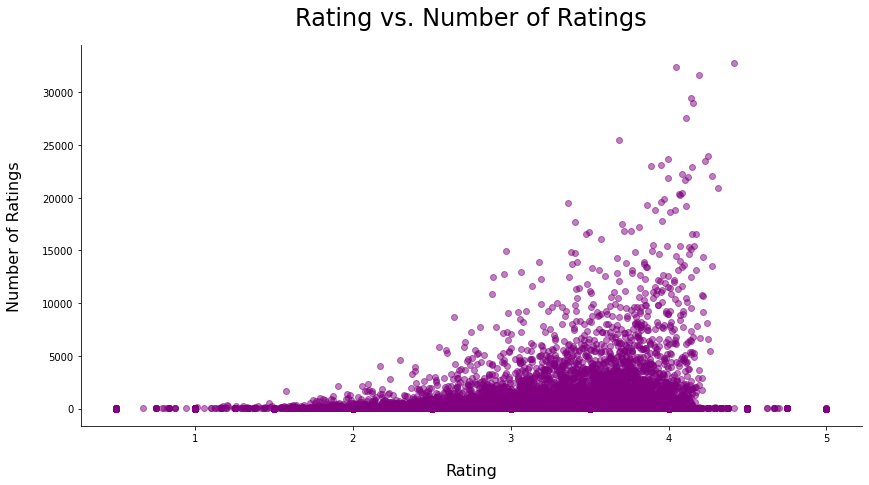

In [48]:
# Merging the merge data earlier on with the df_imbd
df_merge = data.merge(df_imdb, on="movieId" )

#create ratings dataframe
ratings_df = pd.DataFrame()

#extract average ratings
ratings_df['Mean_Rating'] = df_merge.groupby('title')['rating'].mean().values

#extract average number of ratings
ratings_df['Num_Ratings'] = df_merge.groupby('title')['rating'].count().values

#make a plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5, color='purple')

## Visualizing Movie Tittle words by their popularity

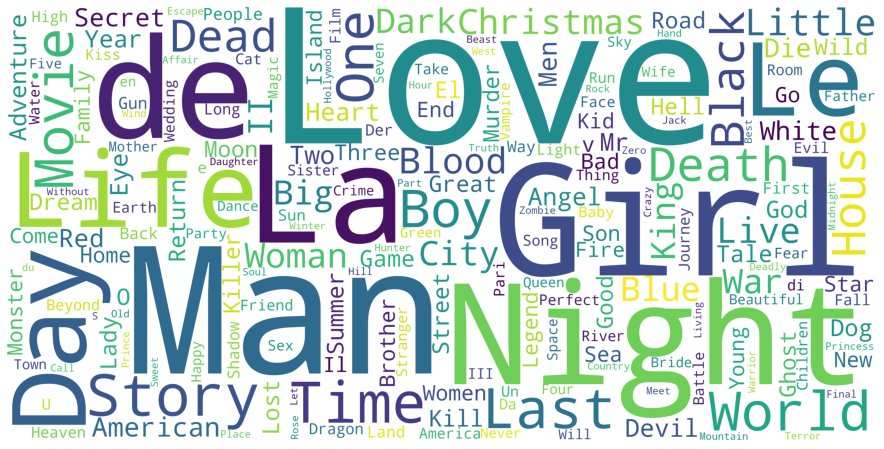

In [49]:
# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Visualising Movies per director

In [50]:
num_ratings = pd.DataFrame(df_merge.groupby('movieId').count()['rating']).reset_index()
#merge num ratings with df_merge3
df_merge = pd.merge(left=df_merge, right=num_ratings, on='movieId')
# rename columns
df_merge.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)
unique_movies = df_merge.drop_duplicates('movieId')
directors = pd.DataFrame(unique_movies.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
# View the first five directors
directors.head()

,director,title
0,Woody Allen,26
1,Luc Besson,26
2,See full summary,25
3,Stephen King,23
4,William Shakespeare,18


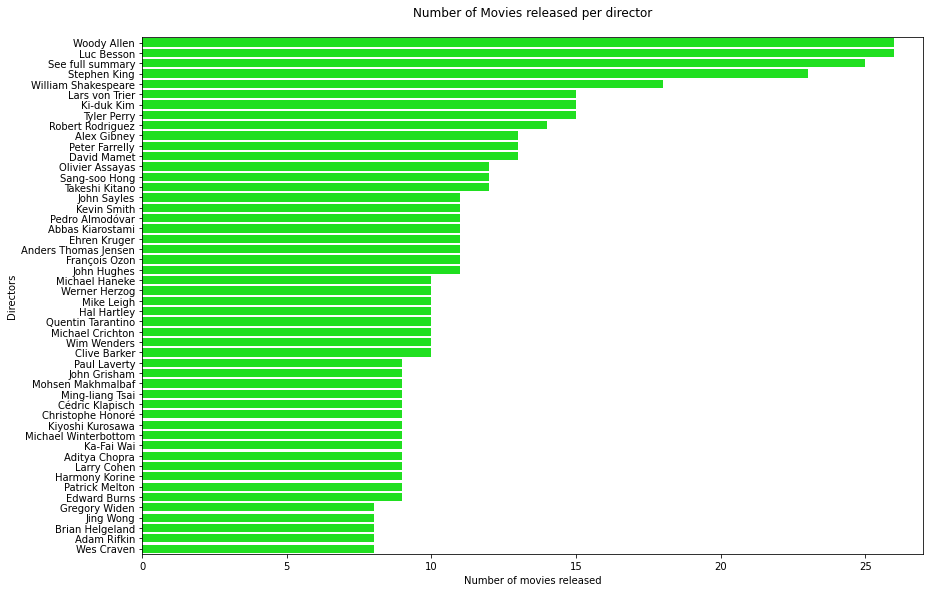

In [51]:
# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = directors.head(50), y = 'director', x = 'title', color = 'lime')
plt.ylabel('Directors')
plt.xlabel('Number of movies released')
plt.title('Number of Movies released per director\n')
plt.xlim(0, 27)
plt.show()

## Visualising ratings per director

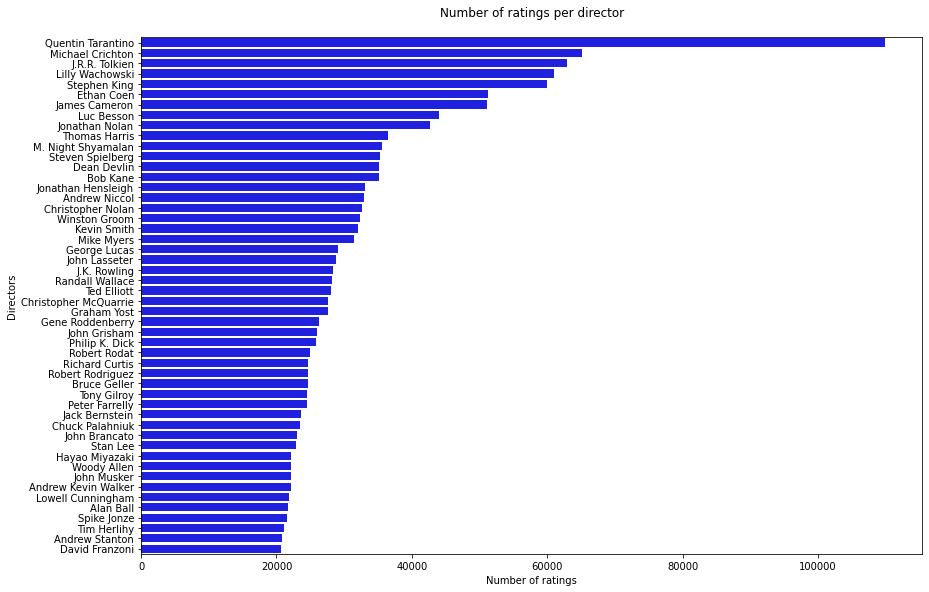

In [53]:
#df_merge3.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:100]
directors2 = pd.DataFrame(unique_movies.groupby('director').sum()['numRatings'].sort_values(ascending=False)).reset_index()

# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = directors2.head(50), y = 'director', x = 'numRatings', color = 'blue')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director\n')
#plt.xlim(0, 27)
plt.show()

<a id="section-four"></a>
# Data Prepartion

Converting Genres into different columns 
Here we just create columns and put there initial value as 0

In [ ]:
x = data.genres
a = list()
for i in x:
    abc = i
    a.append(abc.split('|'))
a = pd.DataFrame(a)   
b = a[0].unique()
for i in b:
    data[i] = 0
data.head(2)

In [ ]:
data.shape

In [ ]:
x = test.genres
a = list()
for i in x:
    abc = i
    a.append(abc.split('|'))
a = pd.DataFrame(a)   
b = a[0].unique()
for i in b:
    test[i] = 0

we assign 1 to all the columns which are present in the Genres


In [7]:
for i in b:
    data.loc[data['genres'].str.contains(i), i] = 1
data.head(2)

,userId,movieId,rating,title,genres,Comedy,Action,Adventure,Drama,Animation,...,Mystery,Sci-Fi,Documentary,Musical,Western,Romance,Film-Noir,(no genres listed),War,IMAX
0,5163.0,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,87388.0,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
for i in b:
    test.loc[test['genres'].str.contains(i), i] = 1

Now there is no use of genre 
Since we have movie id so there is no need for movie names as well

In [9]:
data = data.drop(['genres','title'],axis =1)
test = test.drop(['genres','title'],axis =1)
data.head()

,userId,movieId,rating,Comedy,Action,Adventure,Drama,Animation,Horror,Fantasy,...,Mystery,Sci-Fi,Documentary,Musical,Western,Romance,Film-Noir,(no genres listed),War,IMAX
0,5163.0,57669,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87388.0,57669,3.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,137050.0,57669,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120490.0,57669,4.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50616.0,57669,4.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


check if merging did not create nulls

In [25]:
data.isnull().sum()

userId                14210
movieId                   0
rating                14210
Comedy                    0
Action                    0
Adventure                 0
Drama                     0
Animation                 0
Horror                    0
Fantasy                   0
Thriller                  0
Children                  0
Crime                     0
Mystery                   0
Sci-Fi                    0
Documentary               0
Musical                   0
Western                   0
Romance                   0
Film-Noir                 0
(no genres listed)        0
War                       0
IMAX                      0
dtype: int64

In [26]:
test.isnull().sum()

userId                22780
movieId                   0
Adventure                 0
Drama                     0
Comedy                    0
Action                    0
Children                  0
Crime                     0
Horror                    0
Documentary               0
Animation                 0
Sci-Fi                    0
Fantasy                   0
Mystery                   0
Thriller                  0
Western                   0
Romance                   0
Film-Noir                 0
Musical                   0
(no genres listed)        0
War                       0
IMAX                      0
dtype: int64

Since we see it created some, we drop them from both the training and testing data sets

In [10]:
#WE simply drop the null values coz the are not treatable
data.dropna(inplace= True )
test.dropna(inplace= True )

In [28]:
data.isnull().sum()

userId                0
movieId               0
rating                0
Comedy                0
Action                0
Adventure             0
Drama                 0
Animation             0
Horror                0
Fantasy               0
Thriller              0
Children              0
Crime                 0
Mystery               0
Sci-Fi                0
Documentary           0
Musical               0
Western               0
Romance               0
Film-Noir             0
(no genres listed)    0
War                   0
IMAX                  0
dtype: int64

In [29]:
data.shape

(10000038, 23)

# Modelling phase

In [31]:
df_new.head()

,userId,movieId,rating,Comedy,Action,Adventure,Drama,Animation,Horror,Fantasy,...,Mystery,Sci-Fi,Documentary,Musical,Western,Romance,Film-Noir,(no genres listed),War,IMAX
1,87388.0,57669,3.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,137050.0,57669,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50616.0,57669,4.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,99887.0,57669,0.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,847.0,57669,3.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_new[['userId', 'movieId', 'rating']], reader)

In [13]:
trainset, testset = train_test_split(data, test_size=0.01)

In [34]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.84692419, 0.84655322, 0.84712362]),
 'fit_time': (14.46803069114685, 17.672373056411743, 17.327802658081055),
 'test_time': (32.68492650985718, 34.687000036239624, 27.37818479537964)}

In [35]:

algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.8479


0.8479145158932648

In [36]:
ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]


In [37]:
df_pred=pd.DataFrame(ratings_predictions)
df_pred

,uid,iid,r_ui,est,details
0,1,2011,None,3.520640,{'was_impossible': False}
1,1,4144,None,4.145133,{'was_impossible': False}
2,1,5767,None,3.483287,{'was_impossible': False}
3,1,6711,None,3.807690,{'was_impossible': False}
4,1,7318,None,3.157315,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.281945,{'was_impossible': False}
5000015,162541,4467,None,3.601308,{'was_impossible': False}
5000016,162541,4980,None,2.926752,{'was_impossible': False}
5000017,162541,5689,None,3.012296,{'was_impossible': False}


In [38]:
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [39]:
df_pred.head()

,userId,movieId,rating
0,1,2011,3.520640
1,1,4144,4.145133
2,1,5767,3.483287
3,1,6711,3.807690
4,1,7318,3.157315


In [40]:
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [41]:
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [42]:
df_pred = df_pred[['Id', 'rating']]
df_pred.head()

,Id,rating
0,1_2011,3.520640
1,1_4144,4.145133
2,1_5767,3.483287
3,1_6711,3.807690
4,1_7318,3.157315


In [43]:
df_pred.to_csv("BaselineOnly.csv", index=False)

In [45]:
# Iterate over all other algorithms
count = 1
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor()]:
    algo = algorithm
    predictions = algo.fit(trainset)
    ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred=pd.DataFrame(ratings_predictions)
    df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv("submission" + str(count) + ".csv" , index=False)
    model_save_path = "model" + str(count) + ".pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(algo,file)
    count += 1

Estimating biases using als...
Computing the msd similarity matrix...


MemoryError: Unable to allocate array with shape (51577, 51577) and data type float64

In [ ]:

    algo = KNNBaseline()
    predictions = algo.fit(trainset)
    ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred=pd.DataFrame(ratings_predictions)
    df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv("submission6.csv" , index=False)
    model_save_path = "model6.pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(algo,file)

In [ ]:
    algo = KNNBasic()
    predictions = algo.fit(trainset)
    ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred=pd.DataFrame(ratings_predictions)
    df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv("submission7.csv" , index=False)
    model_save_path = "model7.pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(algo,file)

In [ ]:
    algo = KNNWithMean()
    predictions = algo.fit(trainset)
    ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred=pd.DataFrame(ratings_predictions)
    df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv("submission8.csv" , index=False)
    model_save_path = "model8.pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(algo,file)

In [14]:
# Iterate over all other algorithms
count = 9
for algorithm in [KNNWithZScore()]:
    algo = algorithm
    predictions = algo.fit(trainset)
    ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred=pd.DataFrame(ratings_predictions)
    df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv("submission" + str(count) + ".csv" , index=False)
    model_save_path = "model" + str(count) + ".pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(algo,file)
    count += 1

Computing the msd similarity matrix...
Done computing similarity matrix.


OverflowError: cannot serialize a bytes object larger than 4 GiB

In [14]:
    algo = CoClustering()
    predictions = algo.fit(trainset)
    ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred=pd.DataFrame(ratings_predictions)
    df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv("submission9.csv" , index=False)
    model_save_path = "model9.pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(algo,file)

## Hyperparameter Tuning of the best performing model

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
SVD = SVD()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)params = gs.best_params['rmse']

In [13]:
# Copy of the train dataset
train = df_train.copy()
#reader = Reader(rating_scale=(0, 5))
# Data for training the SVD model
sup_data= Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

In [14]:
# The full dataset for model training
sup_train = sup_data.build_full_trainset()
# The parameters obtained from randomised search CV
algo = SVD(n_factors = 300 , lr_all = 0.006 , reg_all = 0.04 , n_epochs = 60 , init_std_dev = 0.04)
# Fit the model
algo.fit(sup_train)

In [15]:

    ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred=pd.DataFrame(ratings_predictions)
    df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv("optimizedSVD.csv" , index=False)
    model_save_path = "optimizedSVD.pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(algo,file)

# Collaborators

1. John Sekgobela
2. John Bosman
3. Mokitlana Rinkie Sekgobela
4. Samuel Tsabadi
